In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
from google.colab import files
files.upload()

Saving person_202504110240.csv to person_202504110240.csv


{'person_202504110240.csv': b'"id","name","age","address","email","phone_number","registration_date","created_at","updated_at","deleted_at"\n"893e1553-d112-4c73-aac4-16501e64a4c3",\xd0\x95\xd0\xbc\xd0\xb5\xd0\xbb\xd1\x8c\xd1\x8f\xd0\xbd\xd0\xbe\xd0\xb2\xd0\xb0 \xd0\xa1\xd0\xbe\xd1\x84\xd0\xb8\xd1\x8f \xd0\x92\xd0\xb0\xd1\x81\xd0\xb8\xd0\xbb\xd1\x8c\xd0\xb5\xd0\xb2\xd0\xbd\xd0\xb0,25,"\xd0\xba\xd0\xbb\xd1\x85 \xd0\x9a\xd1\x83\xd1\x80\xd1\x83\xd0\xbc\xd0\xba\xd0\xb0\xd0\xbd, \xd0\xb1\xd1\x83\xd0\xbb. \xd0\x9c\xd0\xb0\xd0\xba\xd0\xb0\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb0, \xd0\xb4. 54 \xd1\x81\xd1\x82\xd1\x80. 33, 311602",mishinvitali@example.net,+71208479387,2024-11-27 15:22:11.534 +0300,2025-02-01 15:10:58.975 +0300,2025-04-11 01:41:16.067 +0300,\ncec4ee7a-5508-4f94-a4c3-f8473324e00a,\xd0\xa1\xd0\xbc\xd0\xb8\xd1\x80\xd0\xbd\xd0\xbe\xd0\xb2 \xd0\x90\xd0\xba\xd0\xb8\xd0\xbc \xd0\x90\xd0\xbb\xd0\xb5\xd0\xba\xd1\x81\xd0\xb5\xd0\xb5\xd0\xb2\xd0\xb8\xd1\x87,72,"\xd1\x81\xd1\x82. \xd0\xa8\xd0\xb5\xd

In [3]:
df = pd.read_csv('person_202504110240.csv')

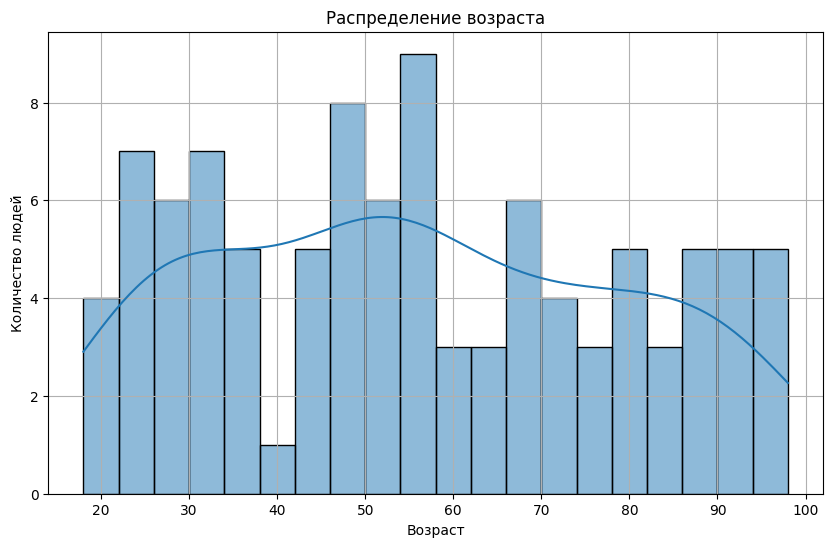

In [4]:

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.grid(True)
plt.show()

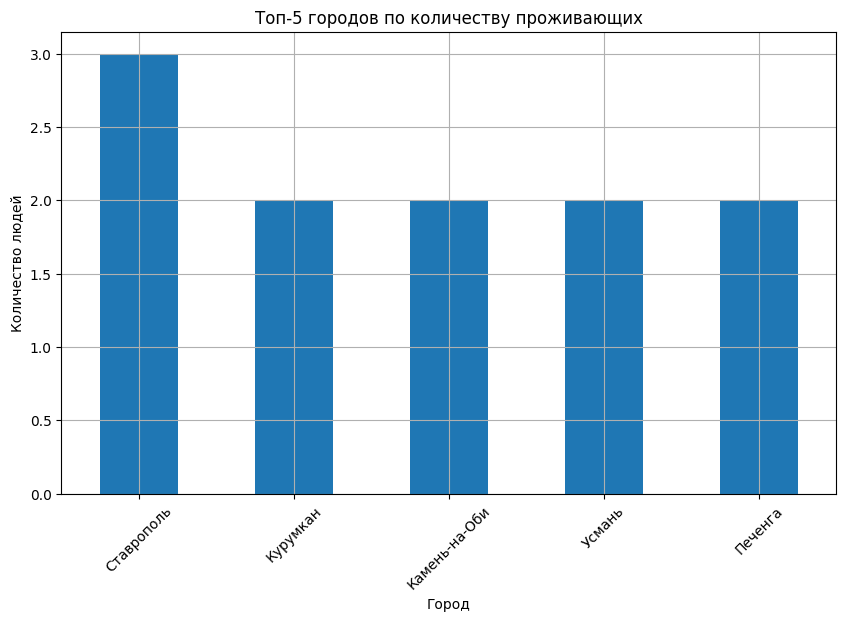

In [5]:

def extract_city(address):
    prefixes = ['г. ', 'д. ', 'с. ', 'п. ', 'к. ', 'клх ', 'ст. ']
    for prefix in prefixes:
        if address.startswith(prefix):
            return address.split(prefix)[1].split(',')[0].strip()
    return 'Неизвестно'

df['city'] = df['address'].apply(extract_city)
city_counts = df['city'].value_counts().head(5)

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Топ-5 городов по количеству проживающих')
plt.xlabel('Город')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

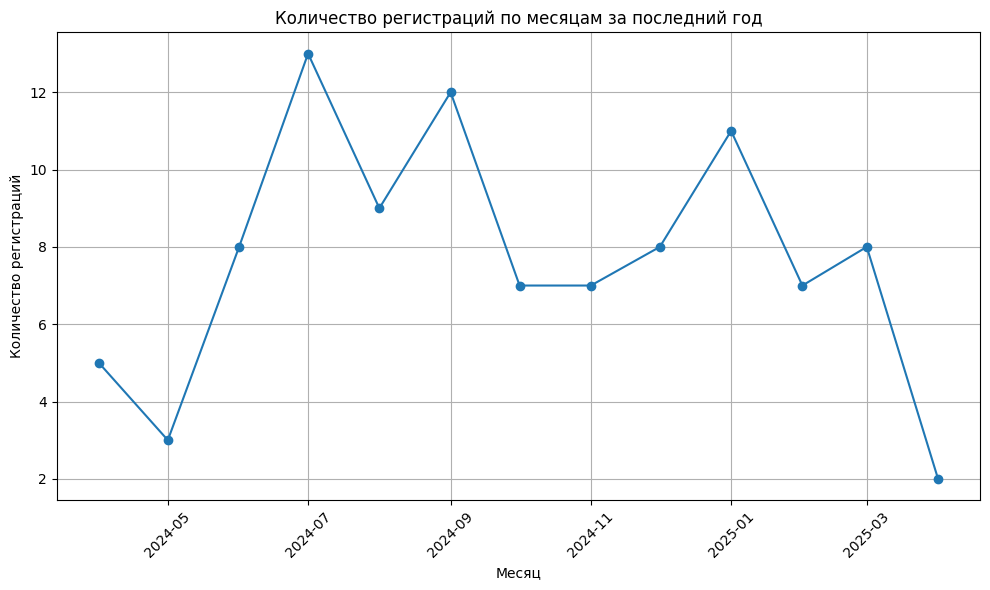

In [10]:
# Преобразуем даты с учетом временной зоны
df['registration_date'] = pd.to_datetime(df['registration_date']).dt.tz_localize(None)


last_year = datetime.now() - timedelta(days=365)
last_year = last_year.replace(tzinfo=None)


monthly_registrations = df[df['registration_date'] >= last_year].copy()
monthly_registrations['year_month'] = monthly_registrations['registration_date'].dt.to_period('M')
monthly_counts = monthly_registrations.groupby('year_month').size().reset_index(name='count')
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    monthly_counts['year_month'],
    monthly_counts['count'],
    marker='o'
)
plt.title('Количество регистраций по месяцам за последний год')
plt.xlabel('Месяц')
plt.ylabel('Количество регистраций')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()